<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_012_Ch7_CPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

# Ch 7. Computer Problems

## C7.1

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
k = 1
b = 1
m1 = m2 = 1
c1 = k * b**2 / m1
c2 = k * b**2 / m2

def dSdt(t, S):
  x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
  rsqr = (x2 - x1)**2 + (y2 - y1)**2
  r = np.sqrt(rsqr)
  ex = (x2 - x1) / r
  ey = (y2 - y1) / r

  ax1 = c1 * -ex / rsqr
  ay1 = c1 * -ey / rsqr
  ax2 = c2 * ex / rsqr
  ay2 = c2 * ey / rsqr

  return np.array([vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2])

In [ ]:
tf = 3.0
N = 1000
tspan = (0.0, tf)
teval = np.linspace(0.0, tf, N+1)
dt = tf / N
S0 = np.array([-10.0, 0.5, 0, -0.5, 10.0, 0.0, 0.0, 0.0])

sol = solve_ivp(dSdt, tspan, S0, "Radau", teval, max_step=dt)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-03 ...  2.997e+00  3.000e+00]
        y: [[-1.000e+01 -9.970e+00 ...  1.993e+01  1.996e+01]
            [ 5.000e-01  5.000e-01 ...  8.956e-01  8.962e-01]
            ...
            [ 0.000e+00  2.964e-05 ... -9.765e-04 -9.839e-04]
            [ 0.000e+00 -2.969e-06 ... -1.991e-01 -1.991e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 7002
     njev: 1
      nlu: 2000

In [ ]:
# 두 입자 사이의 거리
ds = np.sqrt((sol.y[0] - sol.y[1])**2 + (sol.y[2] - sol.y[3])**2)

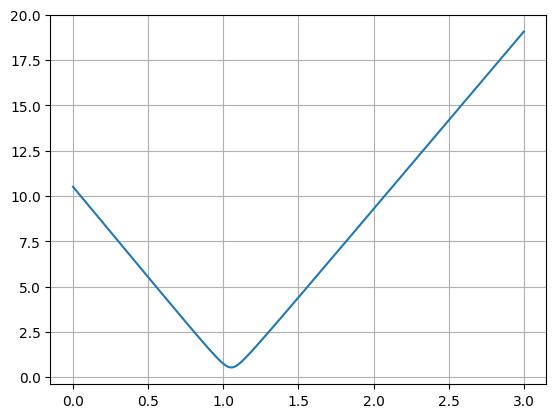

In [ ]:
plt.grid()
plt.plot(sol.t, ds)

In [ ]:
np.where(ds>10.0)[0][:20]

In [ ]:
k = 691

In [ ]:
ds[k], sol.t[k]

In [ ]:
xs1, ys1, xs2, ys2, vxs1, vys1, vxs2, vys2 = sol.y

In [ ]:
plt.grid()
plt.axis("equal")
plt.plot(xs1[:k], ys1[:k], label="m1")
plt.plot(xs2[:k], ys2[:k], label="m2")

In [ ]:
alpha1 = np.arctan2(vys1[k], vxs1[k])
alpha1

In [ ]:
alpha2 = np.arctan2(vys2[k], vxs2[k])
alpha2

In [ ]:
np.abs(alpha1) + np.abs(alpha2), np.pi/2

In [ ]:
(alpha1 - alpha2)/ (np.pi/2)

In [ ]:
O = np.zeros_like(sol.t)

In [ ]:
plt.axis("equal")
plt.quiver(O[k], O[k], vxs1[k], vys1[k], scale_units='xy', angles = 'xy', scale=0)
plt.quiver(O[k], O[k], vxs2[k], vys2[k], scale_units='xy', angles = 'xy', scale=0)

In [ ]:
pxs = m1*(vxs1 + vxs2)
pys = m2*(vys1 + vys2)

In [ ]:
plt.plot(sol.t[:k], pxs[:k])
plt.plot(sol.t[:k], pys[:k])

In [ ]:
KE = 0.5 * m1*(vxs1**2 + vxs2**2) + 0.5 * m2*(vys1**2 + vys2**2)

In [ ]:
plt.plot(sol.t[:k], KE[:k])

## C7.2

In [ ]:
import sympy as sym

In [ ]:
x, y, alpha= sym.symbols(r"x y \alpha")

In [ ]:
r1 = sym.sqrt((x - alpha)**2 + y**2)
r2 = sym.sqrt((x + 1 - alpha)**2 + y**2)

In [ ]:
Phi = -(1-alpha) / r1 - alpha / r2 - (x**2 + y**2) / 2
Phi

In [ ]:
phif = sym.lambdify([[x, y]], -Phi.subs({alpha:0.000953875}))

In [ ]:
from scipy.optimize import minimize

In [ ]:
sol = minimize(phif, np.array([-0.5, 1]))

In [ ]:
sol

In [ ]:
sol.fun

In [ ]:
sol.x

In [ ]:
np.arctan2(sol.x[1], sol.x[0]) / (np.pi)

## C7.3

$$m \frac{d\bf v}{dt}-{\bf V} \frac{dm}{dt} = {\bf F}_{ext}$$

### (a) no air resistance, constant $g$


$$m \frac{d\bf v}{dt}-{\bf V} \frac{dm}{dt} = m{\bf g}$$

In [ ]:
g0 = 9.8     # [m/s^2]
m0 = 2e6     # [kg] initial mass
dmdt = 1.8e4 # [kg/s] exhaust rate
V = 3e3      # [m/s] exhaust speed

In [ ]:
# exhaust time
tf = 0.9 * m0 / dmdt
tf

In [ ]:
def dSdt_a(t, S):
  m, y, v = S
  dvdt = V * dmdt / m - g0
  return np.array([-dmdt, v, dvdt])

In [ ]:
S0 = (m0, 0.0, 0.0)
tspan = (0.0, tf)
N=1000
dt = tf/(10*N)
teval = np.linspace(0, tf, N+1)

sol_a = solve_ivp(dSdt_a, tspan, S0, "RK45", teval, max_step=dt)

In [ ]:
sol_a

In [ ]:
h_max = sol_a.y[1, -1]
km = 1000
print(f"Max height = {h_max/km:.2f} km")

In [ ]:
plt.grid()
plt.plot(sol_a.t, sol_a.y[1], label="y(t)")
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.legend()

In [ ]:
plt.grid()
plt.plot(sol_a.t, sol_a.y[2], label="vy(t)")
plt.xlabel("t [s]")
plt.ylabel("vy [m/s]")
plt.legend()

### (b) Quadratic air drag and varying gravity

$$F(v) = -c_2 v \left| v \right|$$

$$ c_2 (y) =c_2 (0) \exp ^{-y/H}$$

$$g(y) = \frac{9.8}{(1+y/R_E)^2} {\rm m/s^2}$$

with $c_2 (0) = 0.22 D^2$, $D=0.5{\rm m}$, and $H=8{\  \rm km}$.

In [ ]:
D = 0.5 # [m]
c2_0 = 0.22 * D**2
H = 8e3 # [m]
RE = 6.37e6 # [m] average radius of Earth

def c2(y):
  return c2_0 * np.exp(y/H)

def FD(y, v):
  return -c2(y) * v * np.abs(v)

def g(y):
  return 9.8 / (1 + y / RE)**2

In [ ]:
def dSdt_b(t, S):
  m, y, v = S
  dvdt = V * dmdt / m - g(y) + FD(y, v) / m
  return np.array([-dmdt, v, dvdt])

In [ ]:
sol_b = solve_ivp(dSdt_b, tspan, S0, "RK45", teval, max_step=dt)

In [ ]:
sol_b

In [ ]:
h_max_b = sol_b.y[1, -1]
print(f"Max height = {h_max_b/km:.2f} km")

In [ ]:
plt.grid()
plt.plot(sol_b.t, sol_b.y[1], label="y(t)")
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.legend()

In [ ]:
plt.grid()
plt.plot(sol_b.t, sol_b.y[2], label="vy(t)")
plt.xlabel("t [s]")
plt.ylabel("vy [m/s]")
plt.legend()

In [ ]:
vf = sol_b.y[2,-1]
vf

In [ ]:
plt.grid()
plt.plot(sol_b.t[:-1], np.diff(sol_b.y[2])/np.diff(sol_b.t), label="ay(t)")
plt.axhline(0, c='k')
plt.xlabel("t [s]")
plt.ylabel("ay [m/s^2]")
plt.legend()